In [1]:
git_repo = '../../..'

import sys
import os

sys.path.insert(0, os.path.join(git_repo, 'BNP_sensitivity/GMM_clustering/'))

# Linear response libraries
import LinearResponseVariationalBayes as vb
import LinearResponseVariationalBayes.SparseObjectives as obj_lib

# My libraries
import gmm_clustering_lib as gmm_utils
import modeling_lib 
import functional_sensitivity_lib as fun_sens_lib 
import utils_lib

import matplotlib.pyplot as plt
%matplotlib inline

from copy import deepcopy

import numpy as np
import scipy as sp

np.random.seed(453453)

import json 

In [2]:
# Load results from previous fit.
json_input_file = os.path.join(
    git_repo, 'BNP_sensitivity/GMM_clustering/iris_fits/ryan_iris_bnp_full_data_fit.json')

with open(json_input_file, 'r') as fp:
    fit_dict = json.load(fp)
    model = gmm_utils.get_model_from_checkpoint(fit_dict)
    model_ = gmm_utils.get_model_from_checkpoint(fit_dict)
    best_param = model.global_vb_params.get_free()
    kl_hessian = gmm_utils.get_kl_hessian_from_checkpoint(fit_dict)

In [89]:
dim = 4
n_obs = 10
probs = np.random.random((n_obs, dim))
probs = probs / np.sum(probs, axis=1)[:, np.newaxis]

#print(probs)
#print(np.cumsum(probs, axis=1))


def draw_components(probs, u):
    selection = (u <= np.cumsum(probs, axis=1))
    components = np.argmax(selection, axis=1)
    indicator_mat = np.zeros_like(probs)
    indicator_mat[range(n_obs), components] = 1
    return components, indicator_mat

def count_components(components, dim):
    return np.array([ np.sum(components == k) for k in range(dim) ])



In [90]:
u = np.random.random((n_obs, 1))
components, indicator_mat = draw_components(probs, u)

[[0.052 0.318 0.33  0.3  ]
 [0.047 0.437 0.059 0.457]
 [0.555 0.246 0.101 0.098]
 [0.03  0.58  0.023 0.367]
 [0.196 0.116 0.423 0.265]
 [0.06  0.447 0.278 0.215]
 [0.503 0.236 0.134 0.127]
 [0.097 0.572 0.305 0.026]
 [0.163 0.245 0.202 0.39 ]
 [0.077 0.277 0.181 0.465]]
[[0.05030985 0.32787631 0.35275188 0.26906196]
 [0.0536186  0.45128039 0.0514264  0.44367461]
 [0.55932518 0.24027518 0.10209657 0.09830308]
 [0.02806222 0.57244671 0.02314887 0.3763422 ]
 [0.22343547 0.09422307 0.42724036 0.2551011 ]
 [0.06324845 0.43783044 0.30359361 0.1953275 ]
 [0.47930542 0.23882295 0.13523234 0.14663929]
 [0.1004542  0.56931354 0.30339231 0.02683996]
 [0.16130998 0.25199827 0.19411201 0.39257974]
 [0.07325228 0.28248428 0.17809716 0.46616628]]


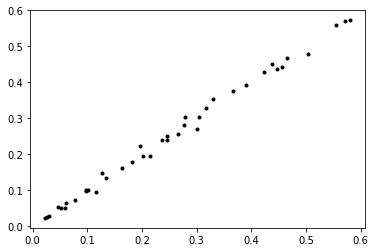

In [94]:
dim = 4
n_obs = 10
probs = np.random.random((n_obs, dim))
probs = probs / np.sum(probs, axis=1)[:, np.newaxis]

n_sims = 1000
count_mat = np.zeros_like(probs)
for sim in range(n_sims):
    u = np.random.random((n_obs, 1))
    components, indicator_mat = draw_components(probs, u)
    count_mat += indicator_mat
    
print(count_mat / n_sims)
print(probs)
plt.plot(count_mat / n_sims, probs, 'k.')

In [100]:

u = np.random.random((n_obs, 1))
components, indicator_mat = draw_components(probs, u)

count_components(components, dim)

array([0, 6, 2, 2])